In [ ]:
# https://neptune.ai/blog/image-processing-python

In [6]:
!pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 330.3 kB/s eta 0:01:56
   ---------------------------------------- 0.1/38.1 MB 469.7 kB/s eta 0:01:21
   ---------------------------------------- 0.1/38.1 MB 722.1 kB/s eta 0:00:53
   ---------------------------------------- 0.2/38.1 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.4/38.1 MB 1.4 MB/s eta 0:00:28
    --------------------------------------- 0.5/38.1 MB 1.7 MB/s eta 0:00:22
    --------------------------------------- 0.7/38.1 MB 2.0 MB/s eta 0:00:19
    --------------------------------------- 0.9/38.1 MB 2.2 MB/s eta 0:00:17
   - ------------

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image # contains all the basic image processing functionality. You can do image resizing, rotation and transformation
from numpy import asarray
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files = os.listdir('/Users/shero/Documents/Artificial Intelligence/Deep Learning/Face Mask Detection/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [6]:
without_mask_files = os.listdir('/Users/shero/Documents/Artificial Intelligence/Deep Learning/Face Mask Detection/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [17]:
# with mask --> 1
# without mask --> 0

with_mask_labels = [1]*3725 # [1]*3725 creates a list with 3725 elements, all of which are the value 1.

without_mask_labels = [0]*3828

In [18]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


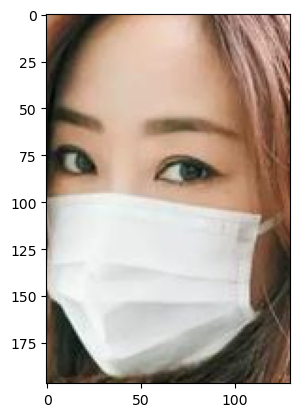

In [22]:
img = mpimg.imread('/Users/shero/Documents/Artificial Intelligence/Deep Learning/Face Mask Detection/data/with_mask/with_mask_189.jpg')
imgplot = plt.imshow(img)
plt.show()

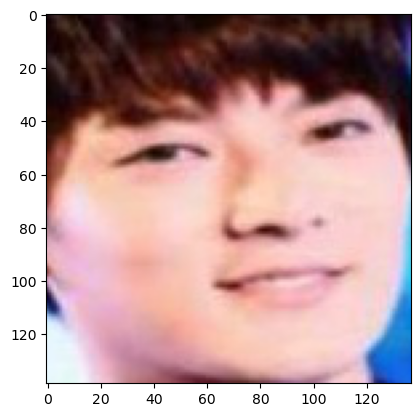

In [23]:
img = mpimg.imread('/Users/shero/Documents/Artificial Intelligence/Deep Learning/Face Mask Detection/data/without_mask/without_mask_25.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing 

In [33]:
# Resize the Images
# Convert the images to numpy arrays
with_mask_path = ('/Users/shero/Documents/Artificial Intelligence/Deep Learning/Face Mask Detection/data/with_mask/')

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') # Converting them to RGB, you ensure that all images have three color channels (red, green, and blue)
  image = np.array(image)
  data.append(image)



without_mask_path = ('/Users/shero/Documents/Artificial Intelligence/Deep Learning/Face Mask Detection/data/without_mask/'
)

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\Users\shero\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [35]:
len(data)

7553

In [37]:
data[8] # representing the intensity value of that color channel at that pixel location. The intensity ranges from 0 to 255

array([[[ 60,  56,  59],
        [ 43,  42,  45],
        [ 41,  42,  44],
        ...,
        [ 61,  64,  79],
        [ 42,  45,  60],
        [ 48,  51,  66]],

       [[ 64,  59,  63],
        [ 44,  41,  44],
        [ 33,  34,  36],
        ...,
        [ 59,  62,  77],
        [ 46,  49,  64],
        [ 67,  70,  85]],

       [[ 57,  51,  56],
        [ 41,  36,  42],
        [ 35,  35,  39],
        ...,
        [ 56,  59,  74],
        [ 45,  48,  63],
        [ 72,  75,  90]],

       ...,

       [[155, 178, 180],
        [158, 179, 180],
        [160, 181, 182],
        ...,
        [132, 142, 160],
        [164, 166, 179],
        [190, 185, 195]],

       [[157, 180, 182],
        [160, 181, 183],
        [162, 183, 184],
        ...,
        [142, 149, 167],
        [180, 180, 192],
        [199, 192, 200]],

       [[158, 181, 184],
        [162, 182, 185],
        [163, 183, 184],
        ...,
        [170, 176, 193],
        [190, 187, 199],
        [201, 192, 199]]

In [38]:
type(data[0])

numpy.ndarray

In [64]:
data[99].shape # The output shape [height, width, channels]

(128, 128, 3)

In [40]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [41]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [44]:
# scaling the data reduce their dimensions from 0 to 1
# Normalization ensures that pixel values are within a consistent range
#scaling pixel values between 0 and 1 can help improve the convergence of neural networks during training.
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [47]:
X_train[1]

array([[[177, 213, 239],
        [177, 213, 239],
        [177, 213, 239],
        ...,
        [194, 230, 255],
        [194, 230, 255],
        [195, 231, 255]],

       [[177, 213, 239],
        [177, 213, 239],
        [177, 213, 239],
        ...,
        [194, 230, 255],
        [194, 230, 255],
        [195, 231, 255]],

       [[177, 213, 239],
        [177, 213, 239],
        [177, 213, 239],
        ...,
        [194, 230, 255],
        [194, 230, 255],
        [195, 231, 255]],

       ...,

       [[ 45,  44,  50],
        [ 45,  44,  50],
        [ 45,  44,  50],
        ...,
        [156, 156, 158],
        [195, 195, 197],
        [122, 122, 124]],

       [[ 46,  45,  51],
        [ 45,  44,  50],
        [ 45,  44,  50],
        ...,
        [120, 120, 122],
        [131, 131, 133],
        [ 67,  67,  69]],

       [[ 47,  46,  52],
        [ 45,  44,  50],
        [ 44,  43,  49],
        ...,
        [ 40,  40,  42],
        [ 35,  35,  37],
        [ 16,  16,  18]]

In [46]:
X_train_scaled[1]

array([[[0.69411765, 0.83529412, 0.9372549 ],
        [0.69411765, 0.83529412, 0.9372549 ],
        [0.69411765, 0.83529412, 0.9372549 ],
        ...,
        [0.76078431, 0.90196078, 1.        ],
        [0.76078431, 0.90196078, 1.        ],
        [0.76470588, 0.90588235, 1.        ]],

       [[0.69411765, 0.83529412, 0.9372549 ],
        [0.69411765, 0.83529412, 0.9372549 ],
        [0.69411765, 0.83529412, 0.9372549 ],
        ...,
        [0.76078431, 0.90196078, 1.        ],
        [0.76078431, 0.90196078, 1.        ],
        [0.76470588, 0.90588235, 1.        ]],

       [[0.69411765, 0.83529412, 0.9372549 ],
        [0.69411765, 0.83529412, 0.9372549 ],
        [0.69411765, 0.83529412, 0.9372549 ],
        ...,
        [0.76078431, 0.90196078, 1.        ],
        [0.76078431, 0.90196078, 1.        ],
        [0.76470588, 0.90588235, 1.        ]],

       ...,

       [[0.17647059, 0.17254902, 0.19607843],
        [0.17647059, 0.17254902, 0.19607843],
        [0.17647059, 0

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [50]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5


170/170 [==============================] - 23s 121ms/step - loss: 0.4858 - acc: 0.7953 - val_loss: 0.2746 - val_acc: 0.8860
Epoch 2/5
170/170 [==============================] - 20s 116ms/step - loss: 0.3091 - acc: 0.8770 - val_loss: 0.2482 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 21s 122ms/step - loss: 0.2589 - acc: 0.8961 - val_loss: 0.2438 - val_acc: 0.8926
Epoch 4/5
170/170 [==============================] - 19s 114ms/step - loss: 0.2082 - acc: 0.9141 - val_loss: 0.1818 - val_acc: 0.9322
Epoch 5/5
170/170 [==============================] - 19s 114ms/step - loss: 0.1812 - acc: 0.9253 - val_loss: 0.1848 - val_acc: 0.9372


In [52]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 2s 38ms/step - loss: 0.1725 - acc: 0.9239
Test Accuracy = 0.9238914847373962


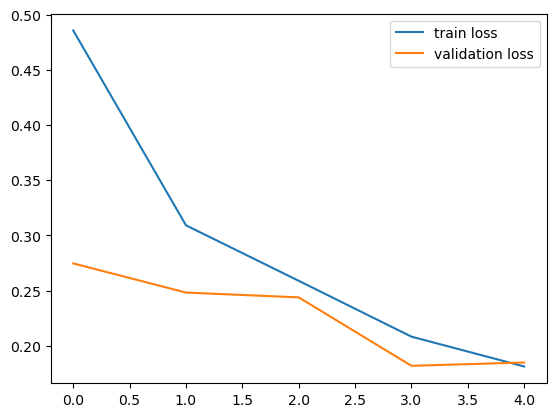

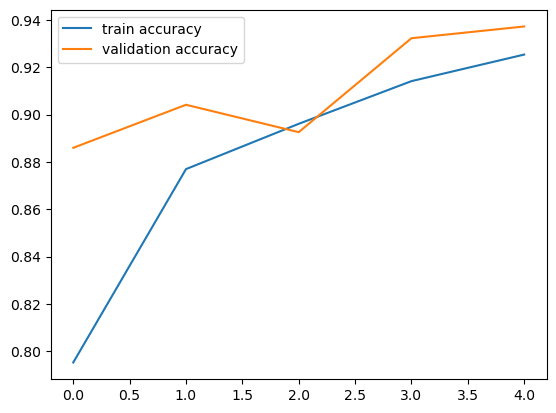

In [53]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: C:/Users/shero/Documents/Artificial Intelligence/Deep Learning/Face Mask Detection/data/without_mask/without_mask_25.jpg


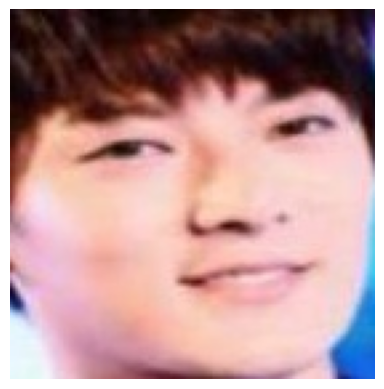

1/1 [==============================] - 0s 39ms/step
The person in the image is not wearing a mask


In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')

In [ ]:
C:/Users/shero/Documents/Artificial Intelligence/Deep Learning/Face Mask Detection/data/without_mask/without_mask_25.jpg